In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
# Read csv and add header
data = pd.read_csv('RadarChuvaJan2021-6d.csv', 
        header=0, names=['day', 'DBZH', 'DBZV', 'KDP', 'ZDR', 'RHOHV', 'Tp_est'])

In [48]:
# Get all rows where Tp_est != 0
pluvi_df = data.loc[data['Tp_est'] != 0]
pluvi_df['Tp_est'].fillna(0, inplace=True)
pluvi_df = pluvi_df.loc[pluvi_df['Tp_est'] != 0]

/tmp/ipykernel_20987/921711716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluvi_df['Tp_est'].fillna(0, inplace=True)


In [49]:
pluvi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12525 entries, 9 to 107110
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     12525 non-null  object 
 1   DBZH    5197 non-null   float64
 2   DBZV    4623 non-null   float64
 3   KDP     2266 non-null   float64
 4   ZDR     12525 non-null  float64
 5   RHOHV   12525 non-null  float64
 6   Tp_est  12525 non-null  float64
dtypes: float64(6), object(1)
memory usage: 782.8+ KB


## Dataset structure
* total rows: **107,135**
* rows where Tp_est is not *zero*: **13,998** -> data we will use
* rows excluded: **93,137**

In [50]:
def create_model(df: pd.DataFrame):
    X = np.array(df.drop(['day', 'Tp_est'], axis=1))
    y = np.array(df['Tp_est'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    scaler = preprocessing.MaxAbsScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    # model = linear_model.LinearRegression()
    # model = SVR(kernel='rbf')
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    print('mse: ', mean_squared_error(y_test, predictions))
    print('mae: ', mean_absolute_error(y_test, predictions))
    
    data = pd.DataFrame({'y_test': y_test, 'predictions': predictions})
    sns.set_theme()
    sns.scatterplot(data=data, x="y_test", y="predictions").set_title('Dispersion Plot')

## Linear Regression

### Drop NaN
* total rows: **1664**

mse:  3.564640736828265
mae:  1.0227710523809526


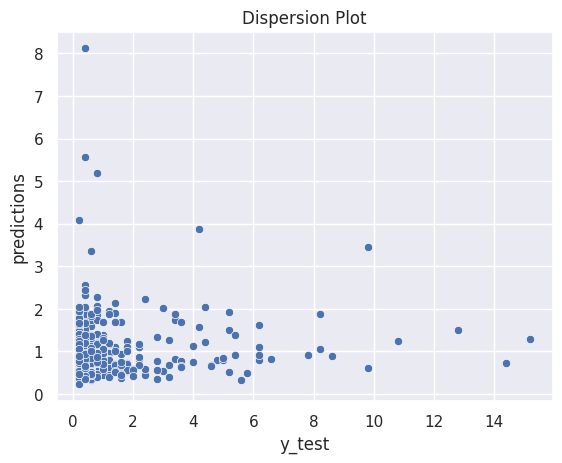

In [51]:
pluvi_df_nan = pluvi_df.dropna()
create_model(pluvi_df_nan)

### Replace NaN with Mean, Median and Zero

#### Mean

/tmp/ipykernel_20987/3145835032.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pluvi_df_mean = pluvi_df.fillna(pluvi_df.mean())


mse:  4.573473075986991
mae:  1.3743548734129094


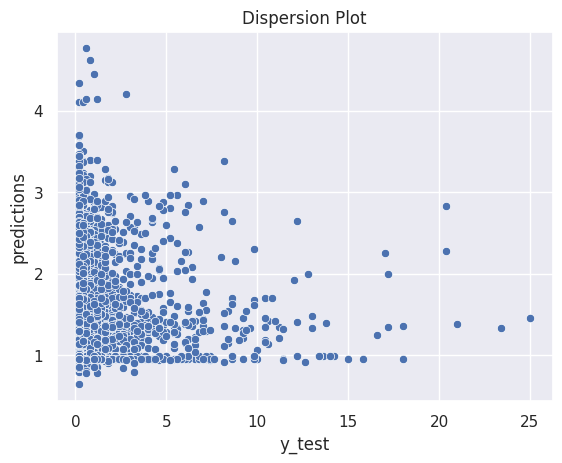

In [52]:
pluvi_df_mean = pluvi_df.fillna(pluvi_df.mean())
create_model(pluvi_df_mean)

#### Median

/tmp/ipykernel_20987/903789717.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pluvi_df_mean = pluvi_df.fillna(pluvi_df.median())


mse:  4.5860043379836055
mae:  1.4288661175735144


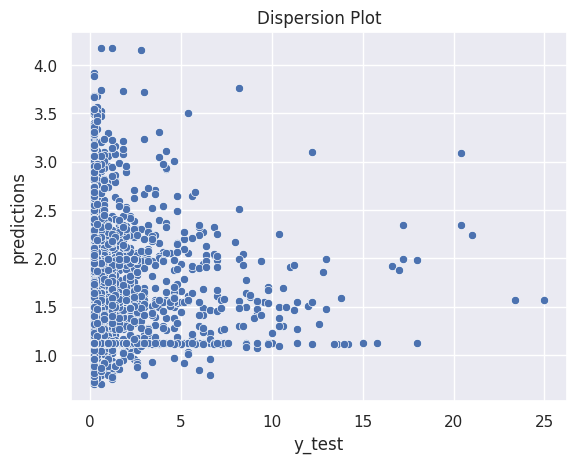

In [53]:
pluvi_df_mean = pluvi_df.fillna(pluvi_df.median())
create_model(pluvi_df_mean)

#### Zero

mse:  5.022648942315564
mae:  1.4275304404571834


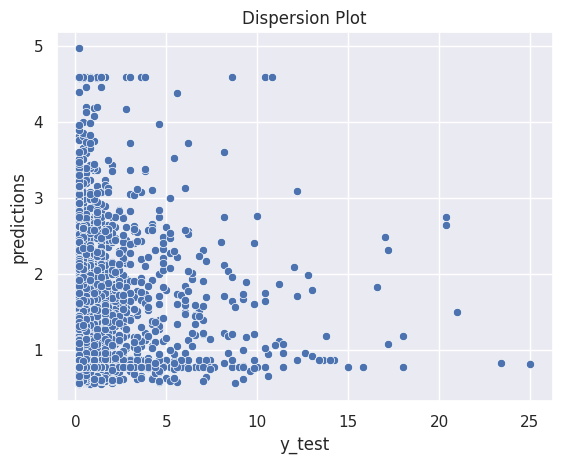

In [54]:
pluvi_df_mean = pluvi_df.fillna(0)
create_model(pluvi_df_mean)

#### KNN Value Imputer

In [55]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(
    pluvi_df[['DBZH', 'DBZV', 'KDP', 'ZDR', 'RHOHV']]), columns = ['DBZH', 'DBZV', 'KDP', 'ZDR', 'RHOHV'])

mse:  5.635459941210929
mae:  1.8295160632785696


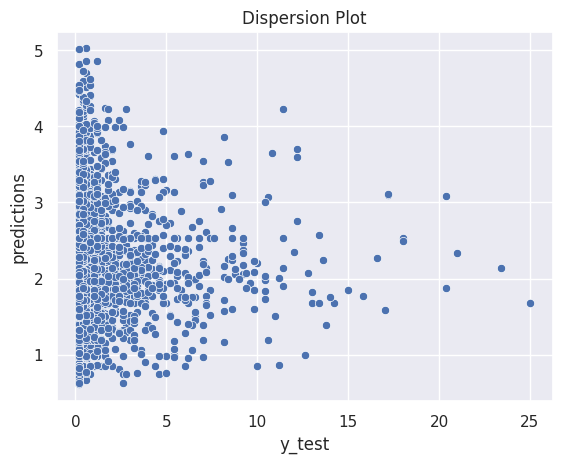

In [56]:
knn_df = df.copy()
knn_df['Tp_est'] = pluvi_df['Tp_est'].values
knn_df['day'] = pluvi_df['day'].values
create_model(knn_df)